有几天没有更新机器学习的系列了，今天进入第七天，KNN
## K近邻算法，一个KNN分类直观表示
### 什么是KNN
K近邻算法是一个最常用简单的分类算法，它也经常被用于回归。  
KNN是一个无参数的（就是说它对数据分布不做任何假设），基于实例（意味着算法无法准确学习模型。它使用记忆训练实例作为替代），并在一个监督学习设置中使用。  
### KNN算法如何工作
KNN用于分类-输出是一个类别（预测一个类别-一个离散值）。  
KNN是通过测量不同特征值之间的距离进行分类。它的思路是：如果一个样本在特征空间中的k个最相似(即特征空间中最邻近)的样本中的大多数属于某一个类别，则该样本也属于这个类别，其中K通常是不大于20的整数。KNN算法中，所选择的邻居都是已经正确分类的对象。该方法在定类决策上只依据最邻近的一个或者几个样本的类别来决定待分样本所属的类别。  
这个方法有三个关键元素：
- 一组标记对象：一组储存的记录
- 对象之间的距离
- K值，最近邻的数值
### 作出预测
为了对未标记对象进行分类，那么就要计算目标对象与已经标记对象之间的距离，即**K近邻**。并且使用周边数量最多的近邻点分类标签作为确定目标对象分类。对于输入变量的实际值，最流行的距离计算是***欧式距离***。
### 距离
***欧式距离***是计算一个新点和现有点所有输入属性上的**差的平方和的平方根**。  
$d(x,y)=\sqrt{\Sigma_{n=k}^1(x_k-y_k)^2}$  
其他流行距离计算包括：  
- Hamming距离
- Manhattan距离$d(x,y)=\sqrt{\Sigma_{n=k}^1|x_k-y_k|}$  
- Minkowski距离
### K取值
找到K值并不容易。KNN算法的结果很大程度取决于K值。一个小的K值意味着噪声对结果有较大的影响；一个大的K值以为这计算成本变大。取决于实际情况，有时最好遍历每个有可能的K值，然后自己决定。 
如下图，绿色圆要被决定赋予哪个类，是红色三角形还是蓝色四方形？如果K=3，由于红色三角形所占比例为2/3，绿色圆将被赋予红色三角形那个类，如果K=5，由于蓝色四方形比例为3/5，因此绿色圆被赋予蓝色四方形类。
![KNN取值举例](https://images0.cnblogs.com/blog2015/771535/201508/041623504236939.jpg)
### 操作步骤
对KNN算法的思想总结一下：就是在训练集中数据和标签已知的情况下，输入测试数据，将测试数据的特征与训练集中对应的特征进行相互比较，找到训练集中与之最为相似的前K个数据，则该测试数据对应的类别就是K个数据中出现次数最多的那个分类，其算法的描述为：
- 计算测试数据与各个训练数据之间的距离；
- 按照距离的递增关系进行排序；
- 选取距离最小的K个点；
- 确定前K个点所在类别的出现频率；
- 返回前K个点中出现频率最高的类别作为测试数据的预测分类。
### 引入库
~~~python
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.model_selection import train_test_split
~~~
### 导入数据集并划分为训练集和测试集
~~~python
dataset=pd.read_excel('.\socialnetwork_ads.xlsx')
# dataset.head()
X=dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,-1].values
# print(y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
~~~
### 特征缩放
~~~python
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
~~~
### 使用KNN对训练集进行训练和预测
~~~python
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
~~~
### 生成混淆矩阵
~~~python
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
~~~
### 可视化


In [9]:
### 引入库
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.model_selection import train_test_split

In [10]:
### 导入数据集并划分为训练集和测试集
dataset=pd.read_excel('.\socialnetwork_ads.xlsx')
# dataset.head()
X=dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,-1].values
# print(y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)


In [11]:
### 特征缩放
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [12]:
### 使用KNN对训练集进行训练
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
### 对测试集进行预测
y_pred=classifier.predict(X_test)

In [15]:
### 生成混淆矩阵
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

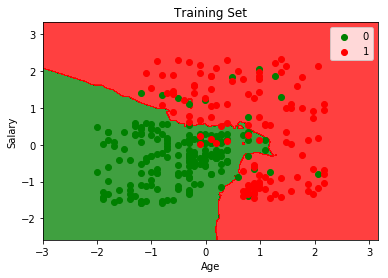

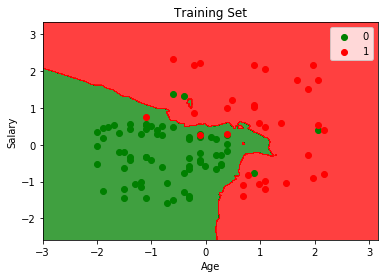

In [16]:
from matplotlib.colors import ListedColormap

X_set, y_set=X_train,y_train
#meshgrid生成网格函数
X1,X2=np.meshgrid(np. arange(start=X_set[:,0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                   np. arange(start=X_set[:,1].min()-1, stop=X_set[:,1].max()+1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('green', 'red')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('green', 'red'))(i), label=j)
plt.title('Training Set')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()

X_set, y_set=X_test,y_test
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1, step=0.01),
                  np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('green', 'red')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('green', 'red'))(i), label=j)
plt.title('Training Set')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()